# Seaborn Visuals

**Covers: Data Visualisation with Seaborn**
_____

### Plot Types:
1. Distribution Plots
  * distplot
      * `sns.displot(df['df_col'])`
  * jointplot
      * `sns.jointplot(x='', y='', data=df)`
  * pairplot
      * `sns.pairplot(df)`
  * kdeplot
      * `sns.kdeplot(df['df_col'])`


2. Categorical Plots
  * barplot
      * `sns.barplot(x='', y='', data=df)`
  * boxplot
      * `sns.boxplot(x='', data=df)`
  * violinplot
      * `sns.violinplot(x='', y='', data=df)`
  * stripplot
      * `sns.stripplot(x='', y='', data=df)`
  * swarmplot
      * `sns.swarmplot(x='', y='', data=df)`


3. Matrix Plots
  * heatmap
      * `sns.heatmap(df.corr())`
      * `sns.heatmap(df.withIndex)`
  * clustermap
      * `sns.clustermap(df)`


4. Grid Plots
  * pairgrid
      * `sns.PairGrid(df)`, `g.map(plt.<>)`
  * facetgrid
      * `sns.FacetGrid(df, col='', row='')`, `g.map(plt.<>, '')`


5. Regression Plots
  * implot
      * `sns.lmplot(x='', y='', data=df)`
_____

### Import and Load Dataset

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

tips = sns.load_dataset('tips')        # Dist, Categ, and Grid plots
flights = sns.load_dataset('flights')  # Matrix plots
iris = sns.load_dataset('iris')        # Grid plots

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


_____

### 1. Distribution Plots

**Distplot**  

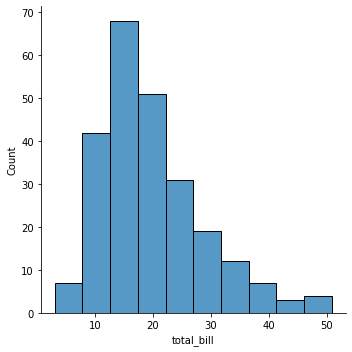

In [2]:
sns.displot(tips['total_bill'], bins=10)

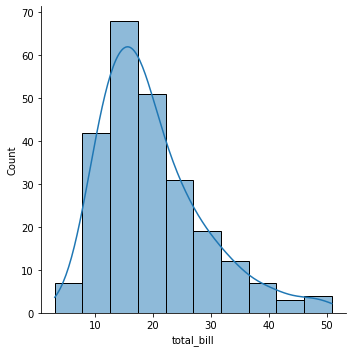

In [3]:
# show KDE with `kde=True`
sns.displot(tips['total_bill'], bins=10, kde=True)

_____
**Jointplot**

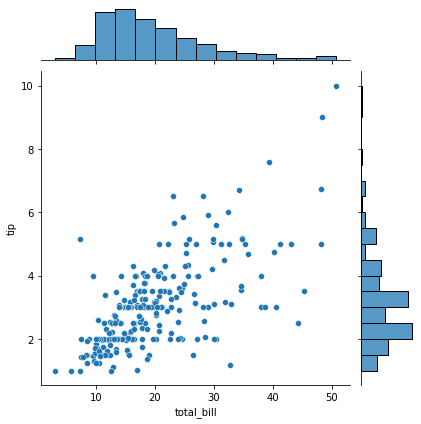

In [4]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')

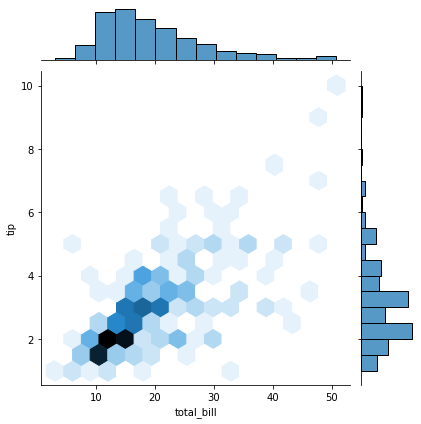

In [5]:
# specify `kind` E.g., reg, kde, hex
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

_____
**Pairplot**

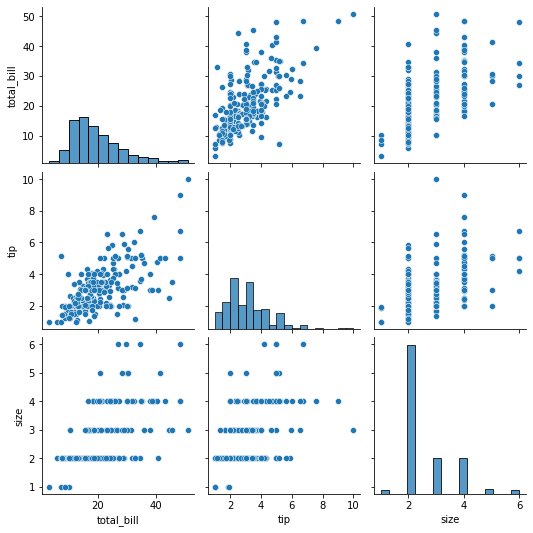

In [6]:
sns.pairplot(tips)

In [ ]:
# categorical comparison with `hue`
sns.pairplot(tips, hue='sex')

_____
**Kdeplot: Kernel Density Estimation**

In [ ]:
sns.kdeplot(tips['total_bill'])

_____

### 2. Categorical Plots

**Barplot**

In [ ]:
sns.barplot(x='sex', y='tip', data=tips)
# default = mean value

In [ ]:
import numpy as np

# change estimator object to a function
sns.barplot(x='sex', y='tip', data=tips, estimator=np.std)

_____
**Countplot**  

In [ ]:
sns.countplot(x='size', data=tips)

_____
**Boxplot**  

In [ ]:
sns.boxplot(x='day', y='total_bill', data=tips)

In [ ]:
# using entire dataframe with `orient='h'`
sns.boxplot(data=tips, orient='h')

_____
**Violinplot**  

In [ ]:
sns.violinplot(x='day', y='total_bill', data=tips)

In [ ]:
# categorical comparison with `hue`
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex')

In [ ]:
# adjacent categorical comparison with `dodge=True`
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)

_____
**Stripplot**  

In [ ]:
# set `jitter=False` for singular line plot
sns.stripplot(x='day', y='total_bill', data=tips)

In [ ]:
# using `hue` and `dodge`
sns.stripplot(x='day', y='total_bill', data=tips, hue='sex', dodge=True)

_____
**Swarmplot**  

In [ ]:
sns.swarmplot(x='day', y='total_bill', data=tips)

_____

### 3. Matrix Plots

**Heatmap**

In [ ]:
# print correlation data
tips.corr()

In [ ]:
# print values with `annot=True`
sns.heatmap(tips.corr(), annot=True)

In [ ]:
flight_df = flights.pivot_table(values='passengers', index='year', columns='month')
flight_df

In [ ]:
sns.heatmap(flight_df)

_____
**Clustermap**  

In [ ]:
# grouped by similarity - passenger count
sns.clustermap(flight_df)

# `standard_scale=1` for normalisation

_____

### 4. Grid Plots

**PairGrid**

In [ ]:
# create grid
g = sns.PairGrid(iris)

# map values
g.map(plt.scatter)

In [ ]:
g = sns.PairGrid(iris)

# specify plot type
g.map_diag(plt.hist)
g.map_upper(sns.kdeplot)
g.map_lower(plt.scatter)

_____
**Facetgrid**  

In [ ]:
# plt.hist
g = sns.FacetGrid(tips, col='smoker', row='sex')
g = g.map(plt.hist, 'total_bill')

In [ ]:
# plt.scatter
g = sns.FacetGrid(tips, col='smoker', row='sex')
g = g.map(plt.scatter, 'total_bill', 'tip')

_____

### 5. Regression Plots

**Implot**

In [ ]:
sns.lmplot(x='total_bill', y='tip', data=tips)

In [ ]:
# categorical comparison with `hue`
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')

In [ ]:
# change marker type
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o','x'])

In [ ]:
# create grids with `row` / `col`
sns.lmplot(x='total_bill', y='tip', data=tips, row='time')